# Support Vector Machines
In this chapter you will learn all about the details of support vector machines. You'll learn about tuning hyperparameters for these models and using kernels to fit non-linear decision boundaries.

# 1. Support vectors
Support vector definition
Which of the following is a true statement about support vectors? To help you out, here's the picture of support vectors from the video (top), as well as the hinge loss from Chapter 2 (bottom).

<img src="_datasets/slides_svm_sv.png">
<img src="_datasets/diagram_hinge_loss.png">

### Possible Answers
1. All support vectors are classified correctly.
2. All support vectors are classified incorrectly.
3. All correctly classified points are support vectors.
4. All incorrectly classified points are support vectors.

<div align=right>Answer: (4)</div>

### 1.2 Effect of removing examples
Support vectors are defined as training examples that influence the decision boundary. In this exercise, you'll observe this behavior by removing non support vectors from the training set.

The wine quality dataset is already loaded into `X` and `y` (first two features only). (Note: we specify `lims` in `plot_classifier()` so that the two plots are forced to use the same axis limits and can be compared directly.)

### Instructions:
* Train a linear SVM on the whole data set.
* Create a new data set containing only the support vectors.
* Train a new linear SVM on the smaller data set.

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from plot_classifier import *

wine = datasets.load_wine()
X, y = wine.data, wine.target
X = X[:,:2] # take only first two features

Number of original examples 178
Number of support vectors 81


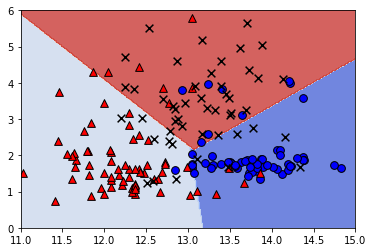

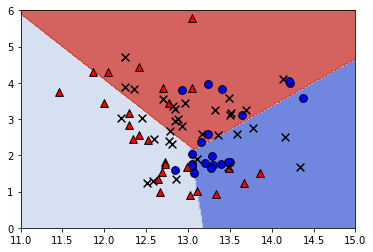

In [2]:
# Train a linear SVM
svm = SVC(kernel="linear")
svm.fit(X, y)
plot_classifier(X, y, svm, lims=(11,15,0,6), ticks=True)

# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
plot_classifier(X_small, y_small, svm_small, lims=(11,15,0,6), ticks=True)

Compare the decision boundaries of the two trained models: are they the same? By the definition of support vectors, they should be!

# 2. Kernel SVMs
### 2.1 GridSearchCV warm-up
In the video we saw that increasing the RBF kernel hyperparameter `gamma` increases training accuracy. In this exercise we'll search for the `gamma` that maximizes cross-validation accuracy using scikit-learn's `GridSearchCV`. A binary version of the handwritten digits dataset, in which you're just trying to predict whether or not an image is a "2", is already loaded into the variables `X` and `y`.

### Instructions:
* Create a `GridSearchCV` object.
* Call the `fit()` method to select the best value of `gamma` based on cross-validation accuracy.

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

data = datasets.load_digits()
X = data.data
y = data.target == 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
X, y = X_train, y_train

In [4]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters, cv=3)
searcher.fit(X, y)

# Report the best parameters
print("Best CV params", searcher.best_params_)

Best CV params {'gamma': 0.001}


Larger values of `gamma` are better for training accuracy, but cross-validation helped us find something different (and better!).

### 2.2 Jointly tuning gamma and C with GridSearchCV
In the previous exercise the best value of `gamma` was 0.001 using the default value of `C`, which is 1. In this exercise you'll search for the best combination of `C` and `gamma` using `GridSearchCV`.

As in the previous exercise, the 2-vs-not-2 digits dataset is already loaded, but this time it's split into the variables `X_train`, `y_train`, `X_test`, and `y_test`. Even though cross-validation already splits the training set into parts, it's often a good idea to hold out a separate test set to make sure the cross-validation results are sensible.

### Instructions:
* Run `GridSearchCV` to find the best hyperparameters using the training set.
* Print the best values of the parameters.
* Print out the accuracy on the test set, which was not used during the cross-validation procedure.

In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

data = datasets.load_digits()
X = data.data
y = data.target == 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
X, y = X_train, y_train

In [6]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters, cv=3)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'C': 10, 'gamma': 0.0001}
Best CV accuracy 0.9988864142538976
Test accuracy of best grid search hypers: 0.9988876529477196


Note that the best value of `gamma`, 0.0001, is different from the value of 0.001 that we got in the previous exercise, when we fixed `C=1`. Hyperparameters can affect each other!

# 3. Comparing logistic regression and SVM (and beyond)
### 3.1 An advantage of SVMs
Which of the following is an advantage of SVMs over logistic regression?

### Possible Answers:
1. They naturally outputs meaningful probabilities.
2. They can be used with kernels.
3. They are computationally efficient with kernels.
4. They learn sigmoidal decision boundaries.

<div align='right'><b>Answer:</b> Having a limited number of support vectors </div>
<div align='right'>makes kernel SVMs computationally efficient. (3)</div>

### 3.2 An advantage of logistic regression
Which of the following is an advantage of logistic regression over SVMs?

### Possible Answers:
1. It naturally outputs meaningful probabilities.
2. It can be used with kernels.
3. It is computationally efficient with kernels.
4. It learns sigmoidal decision boundaries.
<div align=right><b>Answer:</b> (1)</div>

### 3.3 Using SGDClassifier
In this final coding exercise, you'll do a hyperparameter search over the regularization type, regularization strength, and the loss (logistic regression vs. linear SVM) using `SGDClassifier()`.

### Instructions:
* Instantiate an `SGDClassifier` instance with `random_state=0`.
* Search over the regularization strength, the `hinge` vs. `log` losses, and L1 vs. L2 regularization.

In [7]:
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.30, random_state=1)

import warnings
warnings.filterwarnings("ignore") # specifying tol and max_iter in following linear_classifier does not silence warning 

In [8]:
# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0, tol=None, max_iter=5) # tol and max_iter specified to silence warning

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge', 'log'], 'penalty':['l1', 'l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l1'}
Best CV accuracy 0.94351630867144
Test accuracy of best grid search hypers: 0.9592592592592593


One advantage of `SGDClassifier` is that it's very fast - this would have taken a lot longer with `LogisticRegression` or `LinearSVC`.